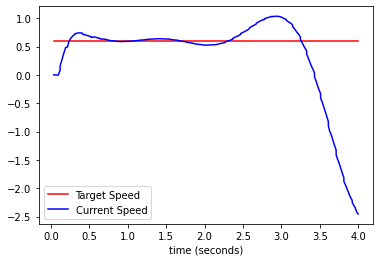

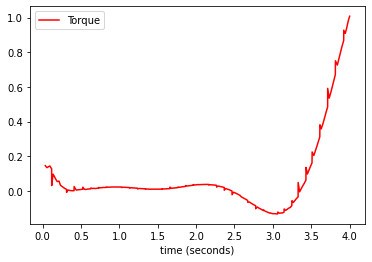

In [31]:
import sys
sys.path.append("../../")

from lib.data.dataplot import *
from lib.dds.dds import *
from lib.system.basic import *
from lib.system.controllers import *
from lib.utils.time import *

dp = DataPlotter()
dp.set_x("time (seconds)")
dp.add_y("target", "Target Speed")
dp.add_y("current", "Current Speed")

fp = DataPlotter()
fp.set_x("time (seconds)")
fp.add_y("torque", "Torque")

dds = DDS()
dds.start()
dds.subscribe(['speed'])

target_speed = 0.6
ctrl = PID_Controller(0.2, 0.4, 0.001)

t = Time()
t.start()
while t.get() < 4:
    
    current_speed = dds.wait('speed')
    delta_t = t.elapsed()
    
    error = target_speed - current_speed
    torque = ctrl.evaluate(delta_t, error)
    
    dds.publish('torque', torque, DDS.DDS_TYPE_FLOAT)
    
    dp.append_x(t.get())
    dp.append_y("target", target_speed)
    dp.append_y("current", current_speed)
    
    fp.append_x(t.get())
    fp.append_y("torque", torque)


dds.publish('torque', 0, DDS.DDS_TYPE_FLOAT)

dp.plot()
fp.plot()